import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


In [1]:
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
emp_data = pd.read_csv("./datasets/MFG10YearTerminationData.csv")
emp_data.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [24]:
# Filter active employees in 2015, since learnins datasets only contain those

active_emp_2015 = emp_data[(emp_data['STATUS'] == 'ACTIVE') & (emp_data['STATUS_YEAR'] == 2015)]

In [17]:
active_emp_2015.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
9,1318,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
19,1319,12/31/2015 0:00,1/3/1957,8/28/1989,1/1/1900,58,26,Vancouver,Executive,VP Stores,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
29,1320,12/31/2015 0:00,1/2/1955,8/28/1989,1/1/1900,60,26,Vancouver,Executive,Legal Counsel,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
39,1321,12/31/2015 0:00,1/2/1959,8/28/1989,1/1/1900,56,26,Vancouver,Executive,VP Human Resources,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
49,1322,12/31/2015 0:00,1/9/1958,8/31/1989,1/1/1900,57,26,Vancouver,Executive,VP Finance,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE


In [19]:
shape = active_emp_2015.shape
print("Número de filas:", shape[0])
print("Número de columnas:", shape[1])

Número de filas: 4799
Número de columnas: 18


In [20]:
ler_data = pd.read_csv("./datasets/employee_learnings_cleaned.csv")
ler_data.head()

,learning_instance_id,EmployeeID,participant_completed,learning_title,rating,length,provider,completion_date,instructor_name,instructor_from
0,xklxam,1318,False,Inventory Management Fundamentals,5,180,Learning Academy,NaN,Prof. Emily Anderson,edX
1,yulhgb,1318,False,Leadership Essentials,2,150,Leadership Institute,NaN,Dr. David Williams,Coursera
2,kufolz,1319,False,Leadership Essentials,5,150,Leadership Institute,NaN,Dr. David Williams,Coursera
3,nwlpwa,1319,False,Strategic Problem-Solving Skills,5,300,Problem-Solving Academy,NaN,Prof. Jennifer Davis,Codecademy
4,ravrmy,1319,True,Customer Service Excellence,3,120,Service Institute,09/07/2015,Dr. John Smith,Coursera


In [21]:
shape = ler_data.shape
print("Número de filas:", shape[0])
print("Número de columnas:", shape[1])

Número de filas: 12182
Número de columnas: 10


In [27]:
#juntar datasets

data = pd.merge(ler_data, active_emp_2015, on='EmployeeID', how='left')
data.head()

,learning_instance_id,EmployeeID,participant_completed,learning_title,rating,length,provider,completion_date,instructor_name,instructor_from,...,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,xklxam,1318,False,Inventory Management Fundamentals,5,180,Learning Academy,NaN,Prof. Emily Anderson,edX,...,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
1,yulhgb,1318,False,Leadership Essentials,2,150,Leadership Institute,NaN,Dr. David Williams,Coursera,...,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
2,kufolz,1319,False,Leadership Essentials,5,150,Leadership Institute,NaN,Dr. David Williams,Coursera,...,Executive,VP Stores,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
3,nwlpwa,1319,False,Strategic Problem-Solving Skills,5,300,Problem-Solving Academy,NaN,Prof. Jennifer Davis,Codecademy,...,Executive,VP Stores,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
4,ravrmy,1319,True,Customer Service Excellence,3,120,Service Institute,09/07/2015,Dr. John Smith,Coursera,...,Executive,VP Stores,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE


In [28]:
data.shape

(12182, 27)

In [29]:
# Generating basic info
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12182 entries, 0 to 12181
Columns: 27 entries, learning_instance_id to BUSINESS_UNIT
dtypes: bool(1), int64(7), object(19)
memory usage: 2.5+ MB


In [30]:
# Checking the null values
data.isnull().sum()

learning_instance_id        0
EmployeeID                  0
participant_completed       0
learning_title              0
rating                      0
length                      0
provider                    0
completion_date          6187
instructor_name             0
instructor_from             0
recorddate_key              0
birthdate_key               0
orighiredate_key            0
terminationdate_key         0
age                         0
length_of_service           0
city_name                   0
department_name             0
job_title                   0
store_name                  0
gender_short                0
gender_full                 0
termreason_desc             0
termtype_desc               0
STATUS_YEAR                 0
STATUS                      0
BUSINESS_UNIT               0
dtype: int64

In [31]:
# Missing values
missing_df = data.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len(data))*100,2)
missing_df

,Total No. of Missing Values,% of Missing Values
learning_instance_id,0,0.00
EmployeeID,0,0.00
participant_completed,0,0.00
learning_title,0,0.00
rating,0,0.00
length,0,0.00
provider,0,0.00
completion_date,6187,50.79
instructor_name,0,0.00
instructor_from,0,0.00


In [32]:
# Check how many didn't complete the learnings
len(data[(data['participant_completed'] == False)])

6187

In [33]:
# Checking duplicates
have_duplicate_rows = data.duplicated().any()
have_duplicate_rows

False

In [34]:
# Descriptive analysis of numeric columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeID,12182.0,5275.022000,1876.633651,1318.0,3721.0,5474.0,6862.0,8336.0
rating,12182.0,2.501067,1.702326,0.0,1.0,3.0,4.0,5.0
length,12182.0,180.416188,71.678133,90.0,120.0,180.0,240.0,300.0
age,12182.0,42.734280,12.555425,21.0,32.0,43.0,54.0,64.0
length_of_service,12182.0,13.325234,6.658039,2.0,8.0,13.0,19.0,26.0
store_name,12182.0,27.696191,13.826753,1.0,17.0,29.0,42.0,46.0
STATUS_YEAR,12182.0,2015.000000,0.000000,2015.0,2015.0,2015.0,2015.0,2015.0


In [35]:
# Descriptive analysis of categorical columns
data.describe(include="O").T

,count,unique,top,freq
learning_instance_id,12182,12182,xklxam,1
learning_title,12182,6,Strategic Problem-Solving Skills,2065
provider,12182,6,Problem-Solving Academy,2065
completion_date,5995,364,07/29/2015,27
instructor_name,12182,6,Prof. Jennifer Davis,2065
instructor_from,12182,5,Coursera,4022
recorddate_key,12182,1,12/31/2015 0:00,12182
birthdate_key,12182,3511,3/19/1989,17
orighiredate_key,12182,3117,7/9/1996,18
terminationdate_key,12182,1,1/1/1900,12182


In [36]:
cols = ["birthdate_key","recorddate_key","learning_instance_id","gender_full","termreason_desc","termtype_desc", "terminationdate_key", "STATUS"]

data.drop(columns=cols, inplace=True)

In [37]:
data.shape

(12182, 19)

In [38]:
# Checking unique values of categorical columns
cat_cols = data.select_dtypes(include="O").columns

for column in cat_cols:
    print('Unique values of ', column, set(data[column]))
    print("-"*127)

Unique values of  learning_title {'Strategic Problem-Solving Skills', 'Effective Workplace Communication', 'Inventory Management Fundamentals', 'Customer Service Excellence', 'Financial Literacy for Professionals', 'Leadership Essentials'}
-------------------------------------------------------------------------------------------------------------------------------
Unique values of  provider {'Finance Masters', 'Problem-Solving Academy', 'Communication Institute', 'Leadership Institute', 'Service Institute', 'Learning Academy'}
-------------------------------------------------------------------------------------------------------------------------------
Unique values of  completion_date {'12/03/2015', '06/24/2015', '04/28/2015', '11/27/2015', '07/29/2015', '12/19/2015', '02/06/2015', '10/17/2015', '05/19/2015', '04/20/2015', '06/18/2015', '04/25/2015', '09/10/2015', '12/08/2015', '03/19/2015', '04/03/2015', '01/22/2015', '11/16/2015', '06/05/2015', '11/01/2015', '08/05/2015', '11/23/20

In [25]:
active_emp = emp_data[(emp_data['STATUS'] == 'ACTIVE') & (emp_data['STATUS_YEAR'] == 2015)]
unique_active_emp = sorted (active_emp['EmployeeID'].unique())
print(unique_active_emp)

[1318, 1319, 1320, 1321, 1322, 1323, 1325, 1328, 1329, 1330, 1331, 1332, 1334, 1335, 1703, 1705, 1706, 1710, 1713, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1726, 1728, 1732, 1733, 1734, 1735, 1736, 1739, 1740, 1741, 1743, 1744, 1745, 1750, 1754, 1755, 1757, 1758, 1762, 1763, 1767, 1768, 1769, 1770, 1771, 1773, 1774, 1775, 1776, 1777, 1779, 1786, 1790, 1791, 1793, 1794, 1800, 1801, 1802, 1803, 1804, 1806, 1808, 1810, 1811, 1812, 1814, 1816, 1817, 1820, 1825, 1827, 1829, 1830, 1831, 1834, 1835, 1836, 1839, 1840, 1841, 1844, 1845, 1846, 1848, 1849, 1850, 1851, 1852, 1853, 1855, 1856, 1857, 1858, 1860, 1862, 1864, 1865, 1866, 1868, 1869, 1870, 1871, 1873, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1884, 1888, 1892, 1895, 1896, 1898, 1899, 1900, 1901, 1902, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1915, 1916, 1919, 1921, 1922, 1923, 1924, 1926, 1927, 1928, 1929, 1931, 1932, 1934, 1937, 1938, 1942, 1944, 1945, 1946, 1948, 1953, 1954, 1955, 1956, 1959, 1960, 1961, 1963, 1964, 1965, 197

In [61]:
active_emp.value_counts()

EmployeeID  recorddate_key   birthdate_key  orighiredate_key  terminationdate_key  age  length_of_service  city_name       department_name   job_title      store_name  gender_short  gender_full  termreason_desc  termtype_desc   STATUS_YEAR  STATUS  BUSINESS_UNIT
1318        12/31/2015 0:00  1/3/1954       8/28/1989         1/1/1900             61   26                 Vancouver       Executive         CEO            35          M             Male         Not Applicable   Not Applicable  2015         ACTIVE  HEADOFFICE       1
6382        12/31/2015 0:00  11/15/1979     12/16/2005        1/1/1900             36   10                 Nanaimo         Processed Foods   Shelf Stocker  18          F             Female       Not Applicable   Not Applicable  2015         ACTIVE  STORES           1
6380        12/31/2015 0:00  11/10/1979     12/13/2005        1/1/1900             36   10                 Cranbrook       Bakery            Baker          8           M             Male         Not Ap

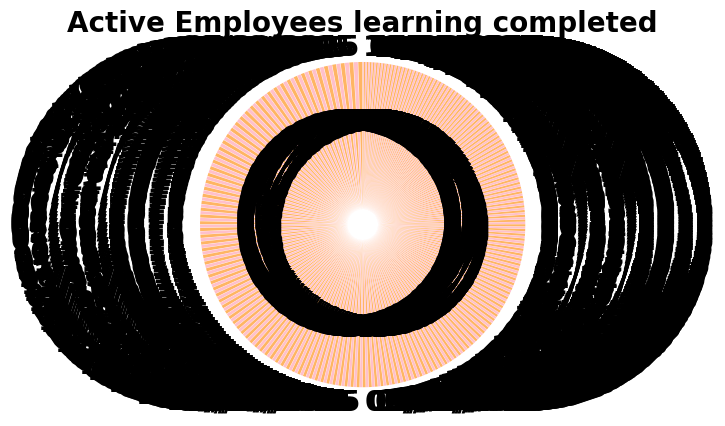

La columna 'active_emp' no existe en el DataFrame 'data'. Verifica el nombre de la columna.


In [65]:
# Data viz (Edurne)
#Visualization to show Total Employees 2015 active complete learning (completio_date Completed)

import matplotlib.pyplot as plt

# Calcula los datos de ler_active_emp
ler_active_emp = df["completion_date"].value_counts()

# Ajusta la lista explode con la misma longitud que ler_active_emp
explode = [0.1] * len(ler_active_emp)

# Crea el gráfico de pastel con la lista explode corregida
plt.title("Active Employees learning completed", fontweight="black", size=20)
plt.pie(ler_active_emp, autopct="%.0f%%", labels=ler_active_emp.index, textprops={"fontweight": "black", "size": 20}, explode=explode, startangle=90, colors=["#ffb563", "#FFC0CB"])
plt.show()

if 'active_emp' in data.columns:
    status_label = data['active_emp'].value_counts()
    plt.figure(figsize=(10, 5))
    sns.barplot(x=status_label.index, y=status_label)
    plt.xlabel('active_emp', fontsize=20)
    plt.ylabel('Count', fontsize=20)
    plt.show()
else:
    print("La columna 'active_emp' no existe en el DataFrame 'data'. Verifica el nombre de la columna.")





#Visualization to show Total Employees 2015 active complete learning x Gender
#Visualization to show Total Employees 2015 active complete learning x Department
#Visualization to show Total Employees 2015 active complete learning x job_title
#Visualization to show Total Employees 2015 active complete learning x business_unit
#Visualization to show Total Employees 2015 active complete learning x city
#Visualization to show Total Employees 2015 active complete learning x antigüedad


In [68]:


status_label = active_emp.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=status_label.index, y=status_label)
plt.xlabel('active_emp', fontsize=20)
plt.ylabel('Count', fontsize=20)


El error que estás viendo, NotImplementedError: isna is not defined for MultiIndex, se debe a un problema con los datos que estás utilizando para generar la gráfica de barras. El error indica que estás intentando realizar una operación que no está definida para un MultiIndex en Pandas.

Un MultiIndex es un índice jerárquico que se utiliza para indexar DataFrames con múltiples niveles de etiquetas. El error ocurre porque la función isna() no se puede aplicar directamente a un MultiIndex.

Para solucionar este error, debes verificar los datos que estás utilizando para generar la gráfica de barras y asegurarte de que estén en un formato adecuado. Si estás utilizando un MultiIndex en tus datos y deseas calcular el conteo de valores únicos en una columna, primero debes reorganizar los datos o realizar alguna manipulación adecuada en el DataFrame para que la operación sea válida.

Si puedes proporcionar más detalles sobre tus datos y cómo están organizados, puedo brindarte una solución más específica.

NotImplementedError: isna is not defined for MultiIndex

<Figure size 1000x500 with 0 Axes>

In [ ]:
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_1 = df["Gender"].value_counts()
value_2 = new_df["Gender"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,palette=["#D4A1E7","#E7A1A1"])
plt.title("Employee Attrition Rate by Gender",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

In [39]:
#recomendartion. EmployeeID, Learning_title

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Create a user-item matrix where rows are employees, columns are learning titles,
# and values are 1 if completed, 0 if not completed
user_item_matrix = data.pivot_table(index='EmployeeID', columns='learning_title', values='participant_completed', fill_value=0)

# Calculate item-item similarity using cosine similarity
item_similarity = cosine_similarity(user_item_matrix.T)

# Function to get learning recommendations for a given employee
def get_recommendations(employee_id, num_recommendations=3):
    # Get the employee's completion history
    employee_completion_history = user_item_matrix.loc[employee_id]

    # Calculate the weighted sum of item similarity with completed items
    weighted_sum_similarity = np.dot(item_similarity, employee_completion_history)

    # Sort learning titles by weighted sum in descending order
    recommended_indices = np.argsort(weighted_sum_similarity)[::-1]

    # Filter out completed learning titles
    recommended_titles = [user_item_matrix.columns[i] for i in recommended_indices if employee_completion_history[i] == 0]

    # Get the top recommended learning titles
    top_recommendations = recommended_titles[:num_recommendations]

    return top_recommendations

# Example: Get recommendations for a given employee (replace 123 with the actual employee ID)
employee_id = 1319
recommended_learning_titles = get_recommendations(employee_id)

# Print the recommended learning titles
print("Recommended learning titles for EmployeeID", employee_id, ":")
for title in recommended_learning_titles:
    print(title)


Recommended learning titles for EmployeeID 1319 :
Leadership Essentials
Effective Workplace Communication
Inventory Management Fundamentals


In [40]:
import pandas as pd
import numpy as np
from sklearn.metrics import jaccard_score

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = data

# Create a user-item matrix where rows are employees, columns are learning titles,
# and values are 1 if completed, 0 if not completed
user_item_matrix = df.pivot_table(index='EmployeeID', columns='learning_title', values='participant_completed', fill_value=0)

# Calculate item-item similarity using Jaccard similarity
item_similarity = pd.DataFrame(0, index=user_item_matrix.columns, columns=user_item_matrix.columns, dtype=float)

for item1 in user_item_matrix.columns:
    for item2 in user_item_matrix.columns:
        if item1 != item2:
            intersection = np.sum((user_item_matrix[item1] == 1) & (user_item_matrix[item2] == 1))
            union = np.sum((user_item_matrix[item1] == 1) | (user_item_matrix[item2] == 1))
            similarity = intersection / union if union != 0 else 0
            item_similarity.at[item1, item2] = similarity

# Function to get learning recommendations for a given employee
def get_recommendations(employee_id, num_recommendations=5):
    # Get the employee's completion history
    employee_completion_history = user_item_matrix.loc[employee_id]

    # Calculate the Jaccard similarity with completed items
    jaccard_similarity = pd.Series(0, index=user_item_matrix.columns, dtype=float)
    for item in user_item_matrix.columns:
        if employee_completion_history[item] == 0:
            intersection = np.sum((employee_completion_history == 1) & (user_item_matrix[item] == 1))
            union = np.sum((employee_completion_history == 1) | (user_item_matrix[item] == 1))
            similarity = intersection / union if union != 0 else 0
            jaccard_similarity[item] = similarity

    # Sort learning titles by Jaccard similarity in descending order
    recommended_titles = jaccard_similarity.sort_values(ascending=False).index

    # Filter out completed learning titles
    completed_learning_titles = df[df['EmployeeID'] == employee_id]['learning_title'].tolist()
    top_recommendations = [title for title in recommended_titles if title not in completed_learning_titles][:num_recommendations]

    return top_recommendations

# Example: Get recommendations for a given employee (replace 123 with the actual employee ID)
employee_id = 1319
recommended_learning_titles = get_recommendations(employee_id)

# Print the recommended learning titles
print("Recommended learning titles for EmployeeID", employee_id, ":")
for title in recommended_learning_titles:
    print(title)


Recommended learning titles for EmployeeID 1319 :
Effective Workplace Communication
Financial Literacy for Professionals
Inventory Management Fundamentals
